In [81]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
import keras
import math

In [82]:
def stock_data_df(start_date, end_date, ticker):
    """
    Function that uses yfinance to download finance data for desired stock between desired date range
    """
    stock_data = yf.download(ticker, start = start_date, end = end_date)
    stock_df = pd.DataFrame(stock_data)
    return stock_df

In [83]:
def update_stock_df(df, ticker):
    """
    Reordered the headers of df to have Name
    """
    df["Name"] = ticker
    df = df[["Name", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
    return df

In [84]:
def save_stock_data(df, start_date, ticker):
    """
    """
    filepath = "resources/"
    filename = ticker
    start_date = dt.date.fromisoformat(start_date).strftime('%Y%m%d')
    end_date = dt.date.today().strftime('%Y%m%d')
    df.to_csv(rf"{filepath}{ticker}_{start_date}_{end_date}.csv")

In [85]:
def create_stock_data_csv(start_date, end_date, ticker):
    """
    """
    stock_df = stock_data_df(start_date, end_date, ticker)
    stock_df = update_stock_df(stock_df, ticker)
    save_stock_data(stock_df, start_date, ticker)

# Start

In [73]:
# Variables for stock data
start_date = "2008-01-01"
end_date = dt.date.today()
ticker = "BAC"

In [74]:
# Generate csv of stock data
create_stock_data_csv(start_date, end_date, ticker)

[*********************100%***********************]  1 of 1 completed


In [76]:
# Creates stock df
aapl_df = stock_data_df(start_date, end_date, ticker)
aapl_df = update_stock_df(aapl_df, ticker)

[*********************100%***********************]  1 of 1 completed


In [77]:
(aapl_df
    # .describe()
    # .count()
    # .nunique()
    # .columns
    # .shape
    # .dtypes
    # .isnull().values.any()
    # .memory_usage(deep = True)
    .memory_usage(deep = True).sum()
)

446355

In [78]:
(aapl_df
    .astype({"Name": "string"})
    # .dtypes
    .memory_usage(deep = True).sum()
)

446355

<AxesSubplot: xlabel='Date'>

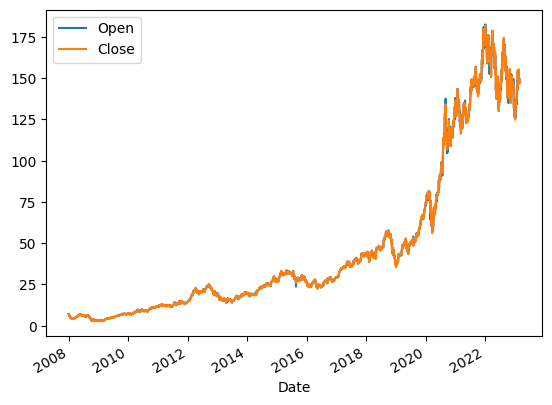

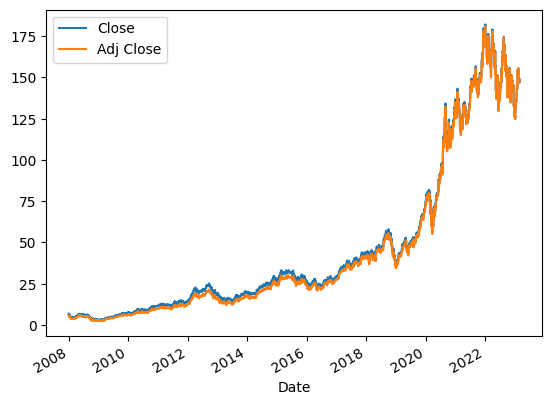

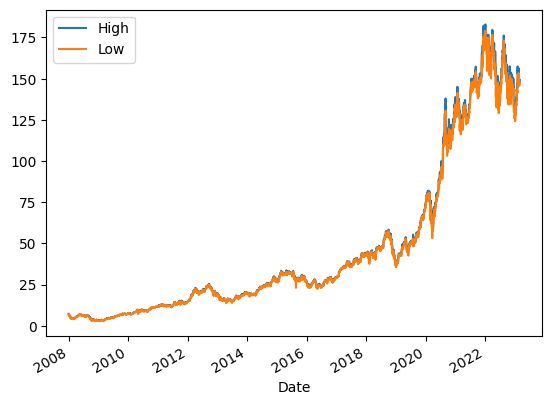

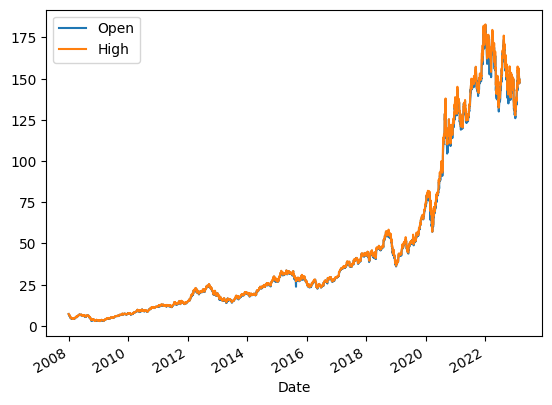

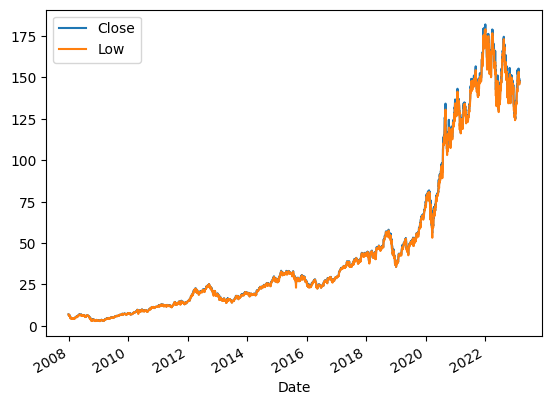

In [79]:
aapl_df[["Open", "Close"]].plot()
aapl_df[["Close", "Adj Close"]].plot()
aapl_df[["High", "Low"]].plot()
aapl_df[["Open", "High"]].plot()
aapl_df[["Close", "Low"]].plot()

<AxesSubplot: xlabel='Date'>

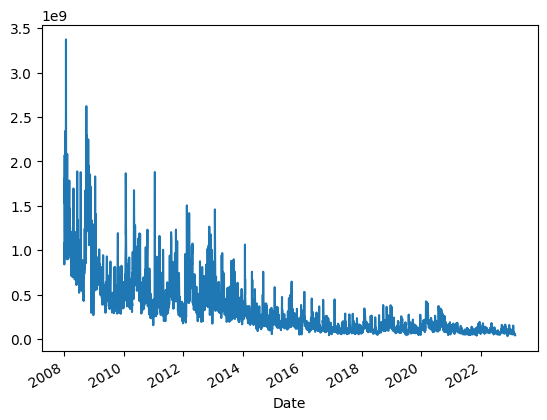

In [80]:
aapl_df["Volume"].plot()

# ML Part

In [40]:
# Set Target Variable
output_var = pd.DataFrame(aapl_df["Close"])

# Selecting the Features
features = ["Open", "High", "Low", "Close"]

In [50]:
#Scaling
scaler = sklearn.preprocessing.MinMaxScaler()
feature_transform = scaler.fit_transform(aapl_df[features])
feature_transform = pd.DataFrame(columns = features, data = feature_transform, index = aapl_df.index)

In [53]:
#Splitting to Training set and Test set
timesplit = sklearn.model_selection.TimeSeriesSplit(n_splits = 10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index) + len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index) + len(test_index))].values.ravel()

In [54]:
#Process the data for LSTM
trainX = np.array(X_train)
testX = np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [57]:
#Building the LSTM Model
lstm = keras.models.Sequential()
lstm.add(LSTM(32, input_shape = (1, trainX.shape[1]), activation = 'relu', return_sequences = False))
lstm.add(Dense(1))
lstm.compile(loss = 'mean_squared_error', optimizer = 'adam')
# plot_model(lstm, show_shapes = True, show_layer_names = True)

In [58]:
#Model Training
history = lstm.fit(X_train, y_train, epochs = 100, batch_size = 8, verbose = 1, shuffle = False)

Epoch 1/100
434/434 [==============================] - 2s 2ms/step - loss: 1475.0638
Epoch 2/100
434/434 [==============================] - 1s 2ms/step - loss: 769.2809
Epoch 3/100
434/434 [==============================] - 1s 2ms/step - loss: 382.0830
Epoch 4/100
434/434 [==============================] - 1s 2ms/step - loss: 205.8213
Epoch 5/100
434/434 [==============================] - 1s 2ms/step - loss: 136.9882
Epoch 6/100
434/434 [==============================] - 1s 2ms/step - loss: 94.5265
Epoch 7/100
434/434 [==============================] - 1s 2ms/step - loss: 58.7924
Epoch 8/100
434/434 [==============================] - 1s 2ms/step - loss: 32.8401
Epoch 9/100
434/434 [==============================] - 1s 2ms/step - loss: 17.5210
Epoch 10/100
434/434 [==============================] - 1s 2ms/step - loss: 9.8771
Epoch 11/100
434/434 [==============================] - 1s 2ms/step - loss: 6.4886
Epoch 12/100
434/434 [==============================] - 1s 2ms/step - loss: 5.050

In [59]:
#LSTM Prediction
y_pred = lstm.predict(X_test)
y_pred

11/11 [==============================] - 0s 2ms/step


array([[143.32184 ],
       [142.63486 ],
       [141.13437 ],
       [143.24359 ],
       [144.6362  ],
       [145.39432 ],
       [148.16327 ],
       [149.19641 ],
       [149.19281 ],
       [149.4975  ],
       [148.81625 ],
       [149.82921 ],
       [149.32205 ],
       [151.52432 ],
       [148.63522 ],
       [149.09311 ],
       [149.94902 ],
       [151.10716 ],
       [151.54347 ],
       [151.50314 ],
       [151.0474  ],
       [150.81442 ],
       [149.16489 ],
       [148.70444 ],
       [149.32782 ],
       [150.59274 ],
       [150.64578 ],
       [152.775   ],
       [155.90895 ],
       [158.89749 ],
       [162.1091  ],
       [160.69832 ],
       [160.9743  ],
       [158.16974 ],
       [159.78787 ],
       [162.55087 ],
       [166.32848 ],
       [161.0437  ],
       [162.36801 ],
       [165.12651 ],
       [169.58072 ],
       [172.8774  ],
       [174.31967 ],
       [176.52155 ],
       [177.66248 ],
       [174.15903 ],
       [175.86086 ],
       [174.9

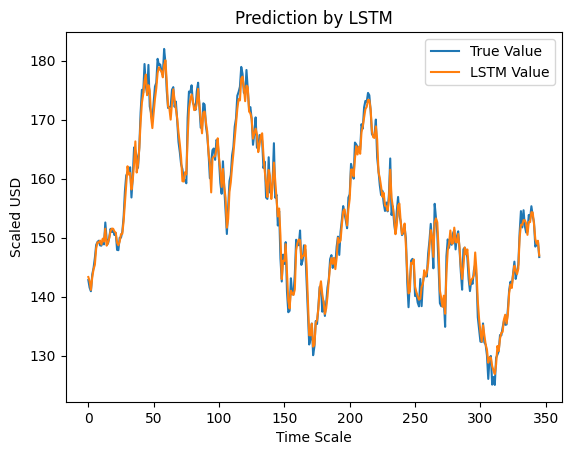

In [60]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [63]:
def denormalize(df, normalized_value):
    df = df["Close"].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)

    #return df.shape, p.shape
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

In [64]:
p = lstm.predict(X_test)
newp = denormalize(aapl_df, p)
newy_test = denormalize(aapl_df, y_test)

11/11 [==============================] - 0s 1ms/step


In [66]:
# use F score to measure the model

def model_F_score(newp, newy_test):
    TP = 0
    FN = 0
    FP = 0
    for i in range(len(newp)-1):
        test_prof = newy_test[i + 1] - newy_test[i]
        p_prof=newp[i + 1] - newp[i]

        if((test_prof >= 0) and (p_prof >= 0)):
            TP = TP + 1
        if ((test_prof >= 0) and (p_prof < 0)):
            FN = FN + 1
        if ((test_prof < 0) and (p_prof >= 0)):
            FP = FP + 1

    Precision = float(TP) / float(TP + FP)
    Recall = float(TP) / float(TP + FN)

    Fscore = 2.0 * Precision * Recall / (Precision + Recall)
    print('classification F score: %.5f' % (Fscore))
    return Fscore

In [67]:
testScore = math.sqrt(sklearn.metrics.mean_squared_error(newp, newy_test))
print('Test Score: %.2f RMSE' % (testScore))

F_score = model_F_score(newp, newy_test)
print('F_score',F_score)

Test Score: 256.71 RMSE
classification F score: 0.78063
F_score 0.7806267806267806
